# 1. 데이터 & 라이브러리 준비

데이터는 Tracker 프로그램을 이용해 저장되었습니다.  

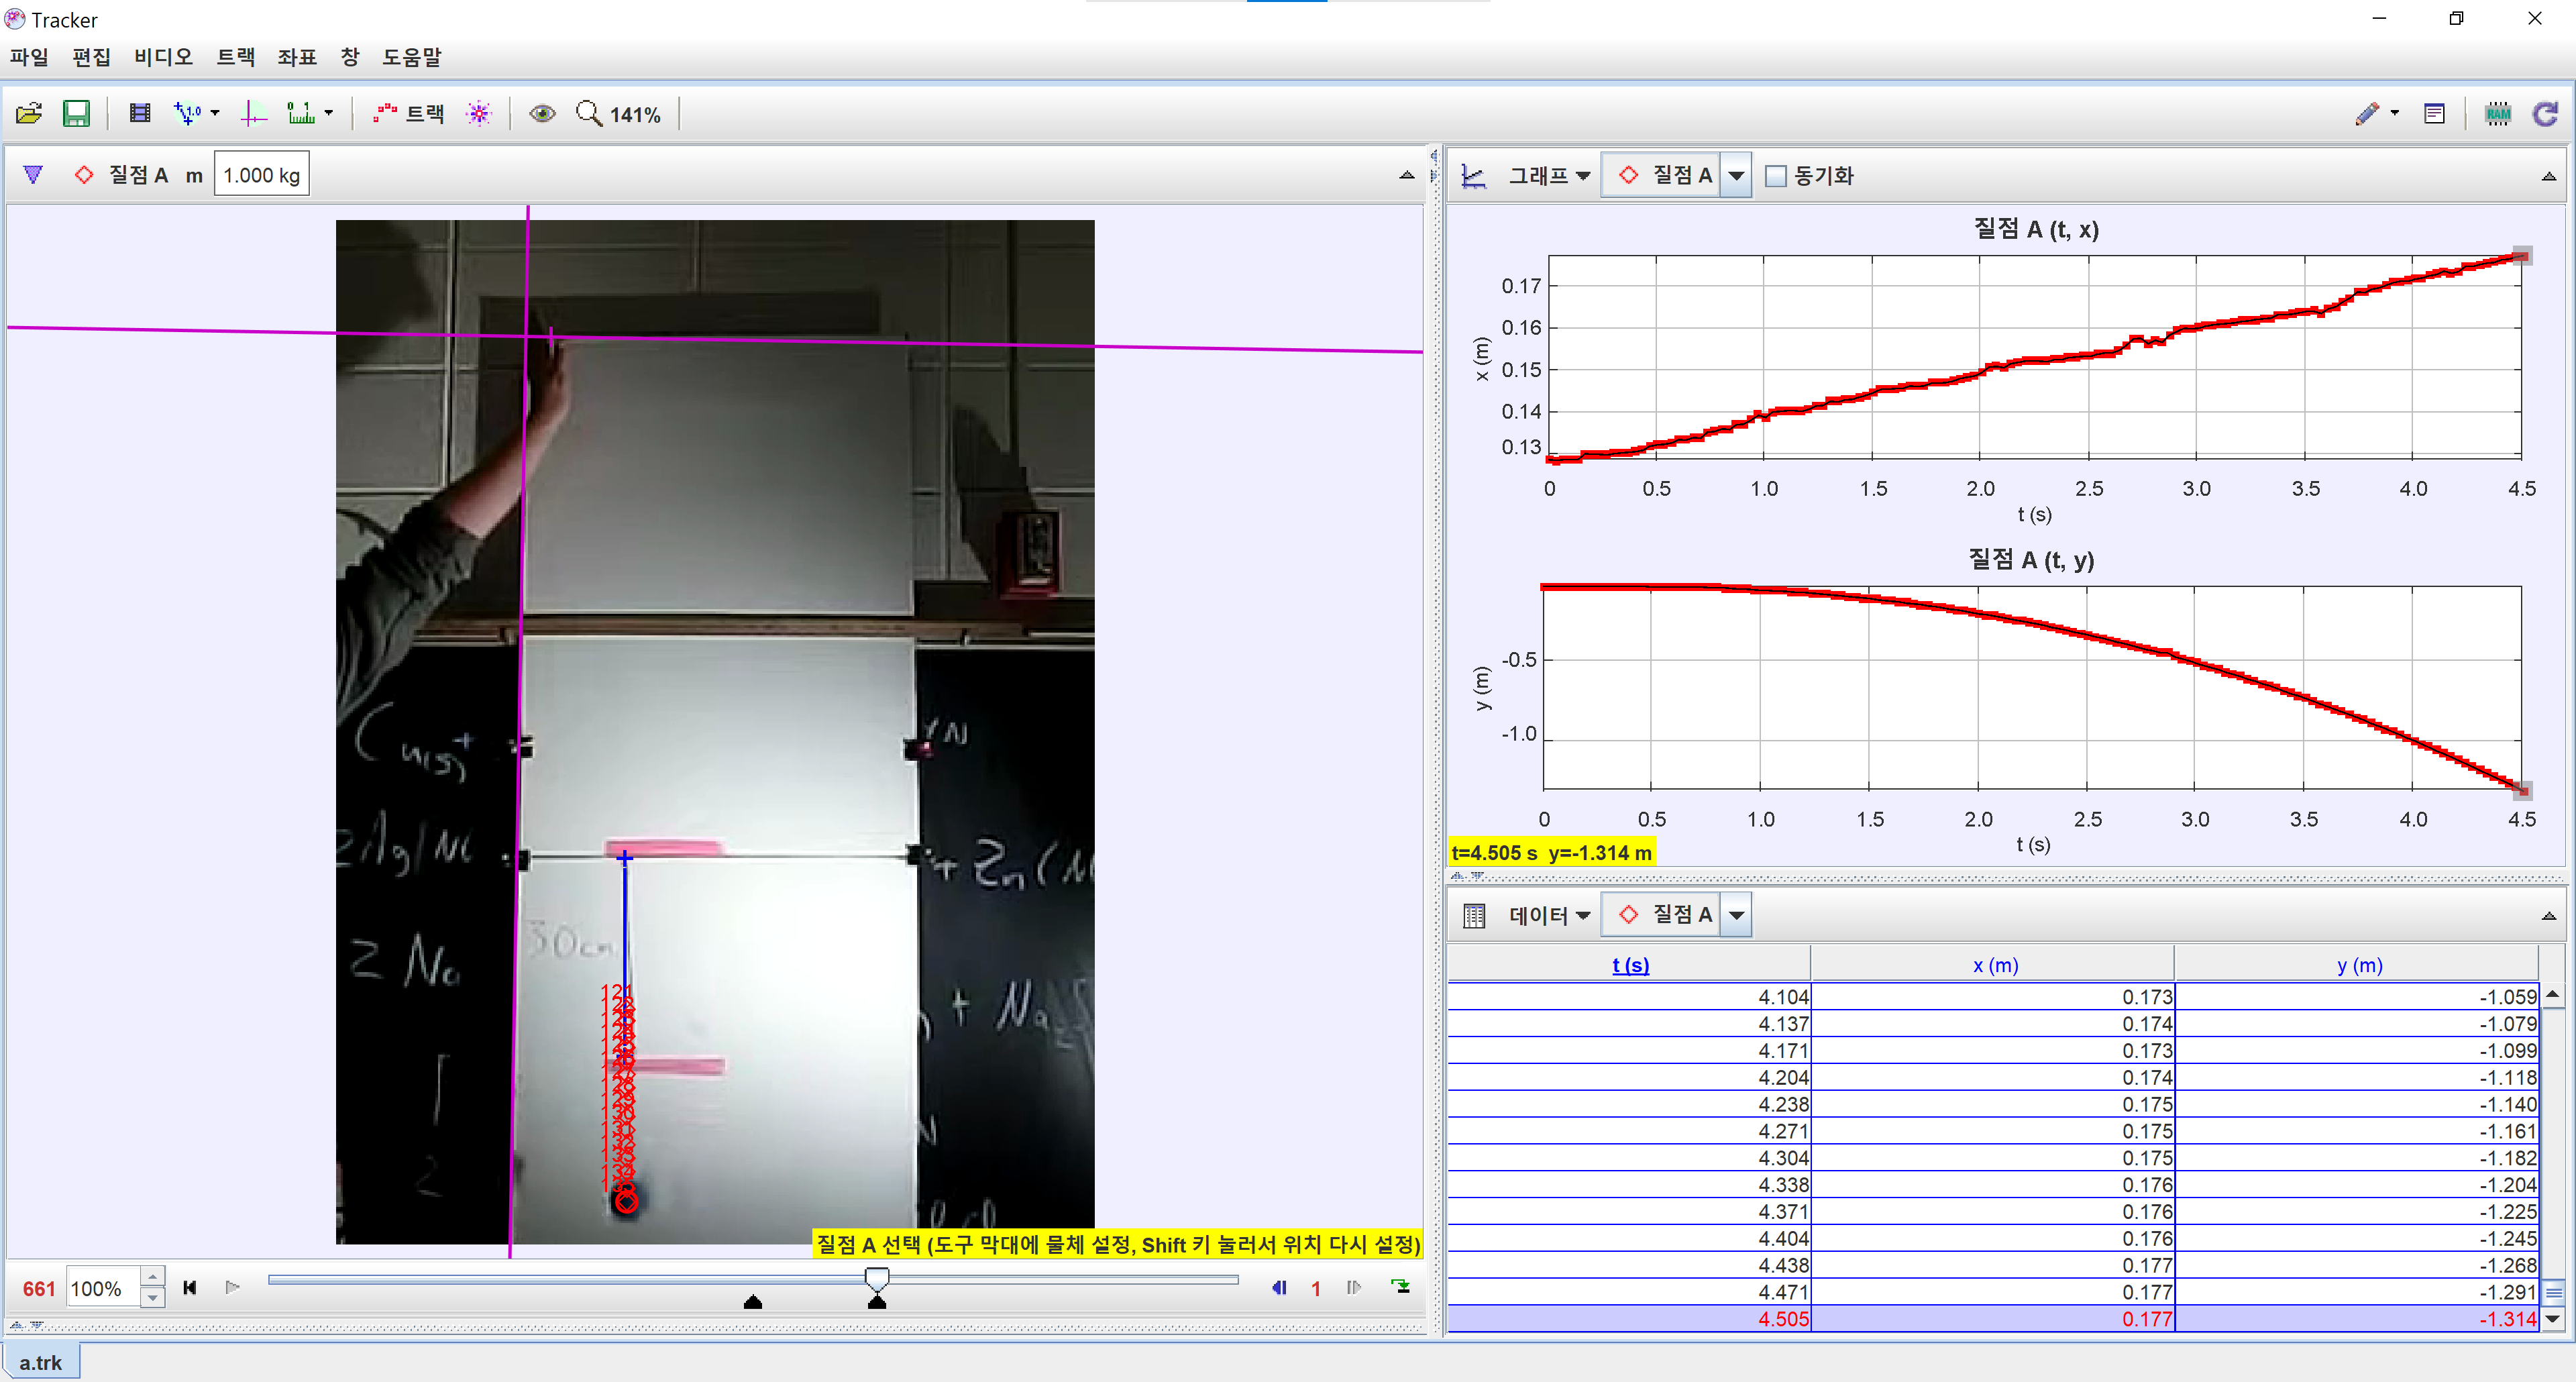

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_excel('free_fall.xlsx') # 자유낙하운동 영상 출처: https://www.youtube.com/watch?v=kssFJ8PNRWw
df.head(7)

t         x         y
0  0.000000  0.128802 -0.025762
1  0.033367  0.128594 -0.025304
2  0.066733  0.128844 -0.025283
3  0.100100  0.128822 -0.025268
4  0.133467  0.128818 -0.025324
5  0.166833  0.130164 -0.027047
6  0.200200  0.130075 -0.026821

In [3]:
df.describe()

t           x           y
count  134.000000  134.000000  134.000000
mean     2.218883    0.151614   -0.387725
std      1.295512    0.014099    0.373307
min      0.000000    0.128594   -1.267976
25%      1.109442    0.140318   -0.649734
50%      2.218884    0.152213   -0.250917
75%      3.328325    0.162415   -0.057535
max      4.437767    0.176586   -0.025268

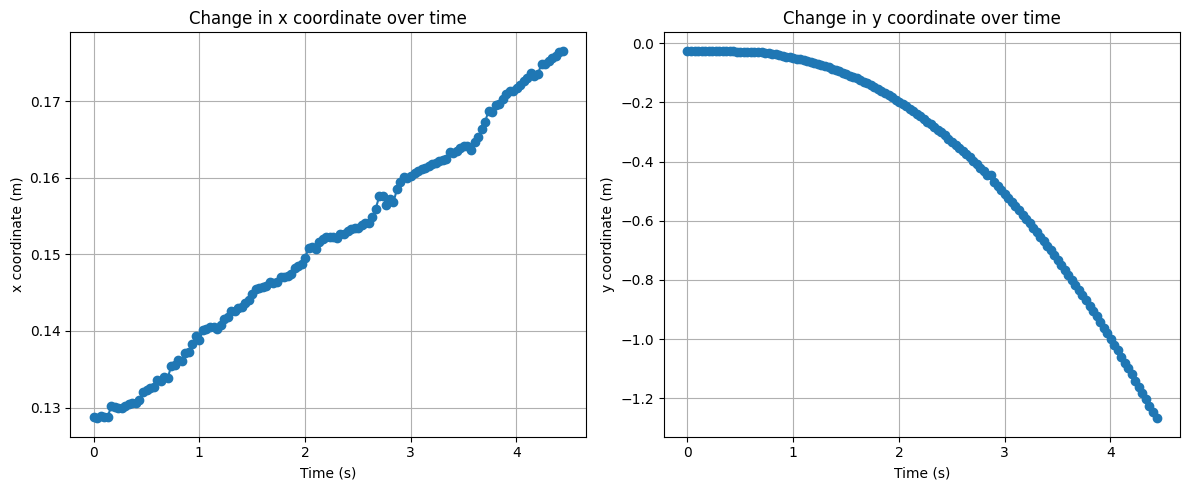

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df['t'], df['x'], 'o-', label='x coordinate')
plt.xlabel('Time (s)')
plt.ylabel('x coordinate (m)')
plt.title('Change in x coordinate over time')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df['t'], df['y'], 'o-', label='y coordinate')
plt.xlabel('Time (s)')
plt.ylabel('y coordinate (m)')
plt.title('Change in y coordinate over time')
plt.grid(True)

plt.tight_layout()
plt.show()

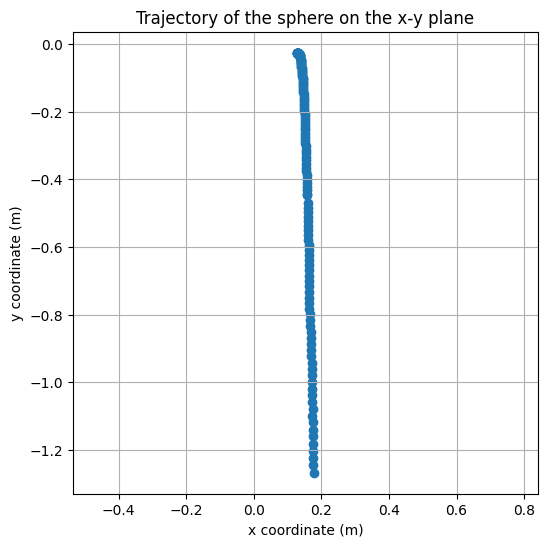

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'])
plt.xlabel('x coordinate (m)')
plt.ylabel('y coordinate (m)')
plt.title('Trajectory of the sphere on the x-y plane')
plt.axis('equal')
plt.grid(True)
plt.show()

# 2. PCA (Principal Component Analysis)


In [6]:
X = df[['x', 'y']].values
scaler = StandardScaler(with_std=False)
X_centered = scaler.fit_transform(X)

#### PCA 분석 및 결과 시각화

Principal Components (Eigenvectors): [[-0.03574944  0.99936078]
 [ 0.99936078  0.03574944]]
Explained Variance Ratio: [9.99853272e-01 1.46727709e-04]


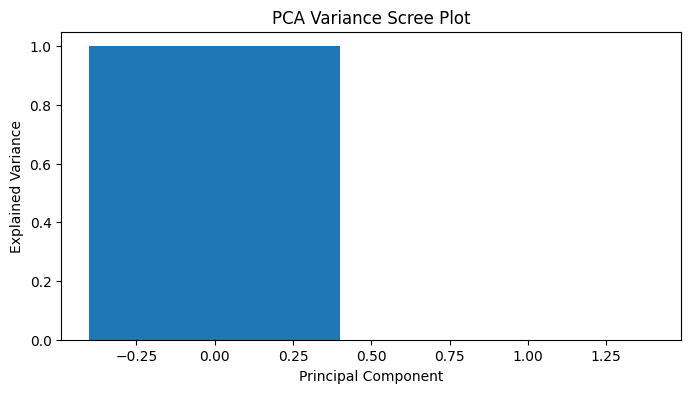

In [8]:
pca = PCA()
X_pca = pca.fit_transform(X_centered)

print("Principal Components (Eigenvectors):", pca.components_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('PCA Variance Scree Plot')
plt.show()

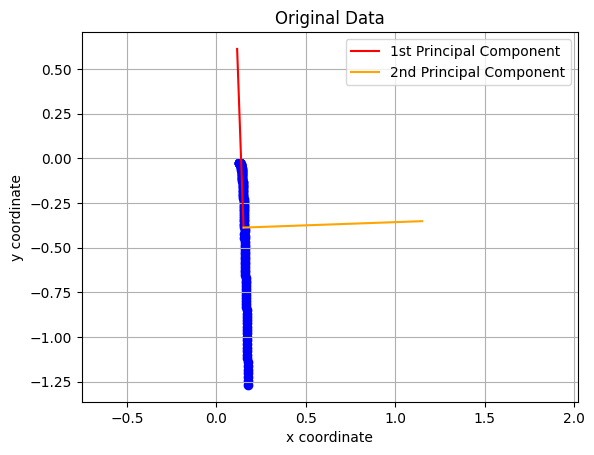

In [12]:
mean = np.mean(X, axis=0)
pc1 = pca.components_[0]
pc2 = pca.components_[1]

plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.plot([mean[0], mean[0] + pc1[0]], [mean[1], mean[1] + pc1[1]], 'r-', label='1st Principal Component')
plt.plot([mean[0], mean[0] + pc2[0]], [mean[1], mean[1] + pc2[1]], 'orange', label='2nd Principal Component')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Original Data')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

#### 데이터 차원 축소

In [13]:
pca_reduced = PCA(n_components=1)
X_pca_reduced = pca_reduced.fit_transform(X_centered)

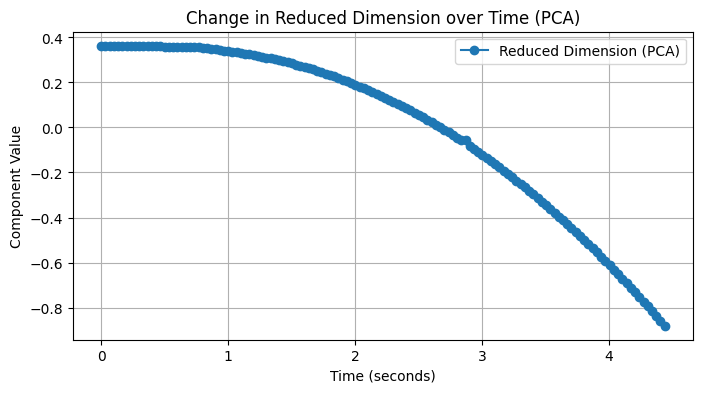

In [58]:
plt.figure(figsize=(8, 4))
plt.plot(df['t'], X_pca_reduced, 'o-', label='Reduced Dimension (PCA)')
plt.xlabel('Time (seconds)')
plt.ylabel('Component Value')
plt.title('Change in Reduced Dimension over Time (PCA)')
plt.grid(True)
plt.legend()
plt.show()

#### 데이터 복원

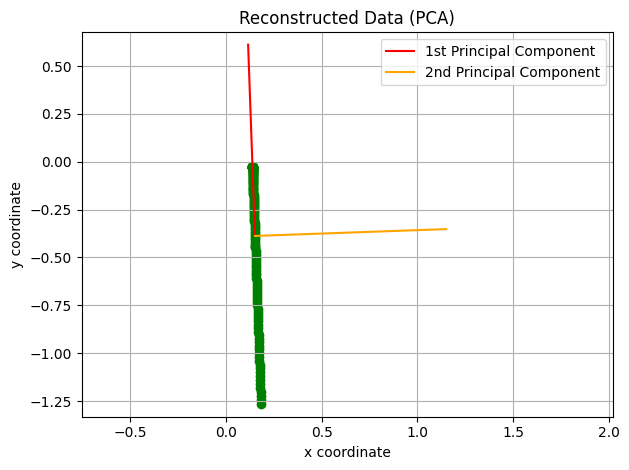

In [15]:
X_pca_reconstructed = pca_reduced.inverse_transform(X_pca_reduced)
X_pca_reconstructed = X_pca_reconstructed + mean

plt.scatter(X_pca_reconstructed[:, 0], X_pca_reconstructed[:, 1], color='green')
plt.plot([mean[0], mean[0] + pc1[0]], [mean[1], mean[1] + pc1[1]], 'r-', label='1st Principal Component')
plt.plot([mean[0], mean[0] + pc2[0]], [mean[1], mean[1] + pc2[1]], 'orange', label='2nd Principal Component')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Reconstructed Data (PCA)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
reconstruction_error = np.mean(np.square(X_centered - X_pca_reconstructed))
print(f'Reconstruction MSE: {reconstruction_error:.8f}')

Reconstruction MSE: 0.08666876


# 3. SVD (Singular Value Decomposition)

Singular Values: [4.30794214 0.05218645]
Explained Variance Ratio: [9.99853272e-01 1.46727709e-04]


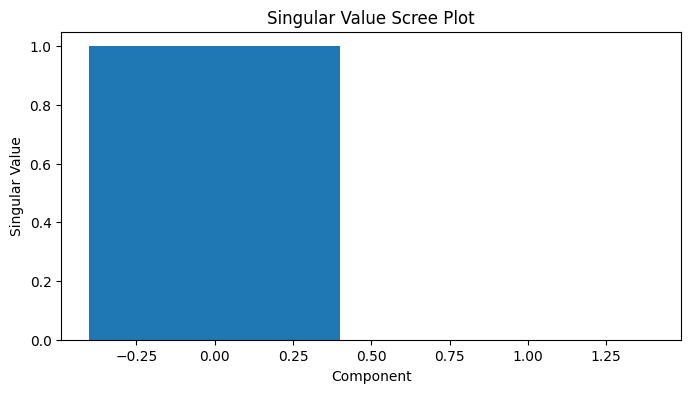

In [30]:
U, sigma, VT = np.linalg.svd(X_centered, full_matrices=False)
print("Singular Values:", sigma)

explained_ratio = (sigma**2) / np.sum(sigma**2)
print("Explained Variance Ratio:", explained_ratio)

plt.figure(figsize=(8, 4))
plt.bar(range(len(sigma)), explained_ratio)
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Value Scree Plot')
plt.show()

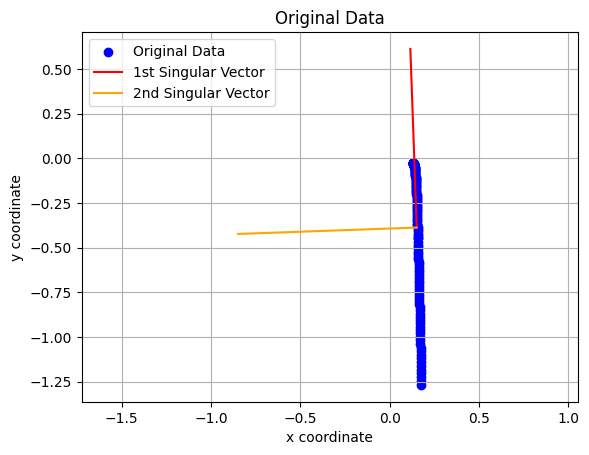

In [59]:
sv1 = VT[0]
sv2 = VT[1]

plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')
plt.plot([mean[0], mean[0] + sv1[0]], [mean[1], mean[1] + sv1[1]], 'r-', label='1st Singular Vector')
plt.plot([mean[0], mean[0] + sv2[0]], [mean[1], mean[1] + sv2[1]], color='orange', label='2nd Singular Vector')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Original Data')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

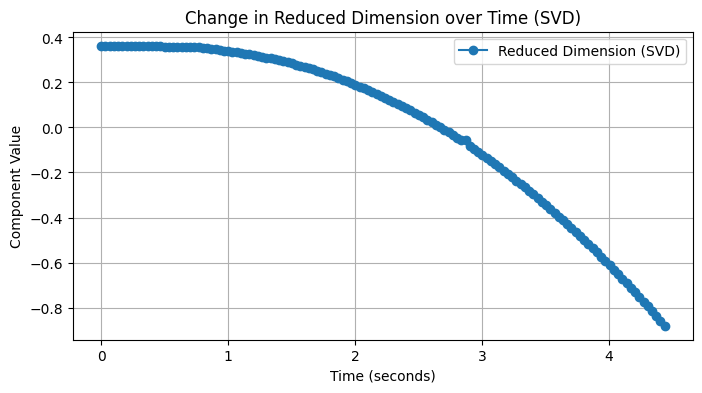

In [32]:
U, sigma, VT = np.linalg.svd(X_centered, full_matrices=False)

k = 1
X_reduced_svd = U[:, :k] * sigma[:k]

plt.figure(figsize=(8, 4))
plt.plot(df['t'], X_reduced_svd, 'o-', label='Reduced Dimension (SVD)')
plt.xlabel('Time (seconds)')
plt.ylabel('Component Value')
plt.title('Change in Reduced Dimension over Time (SVD)')
plt.grid(True)
plt.legend()
plt.show()

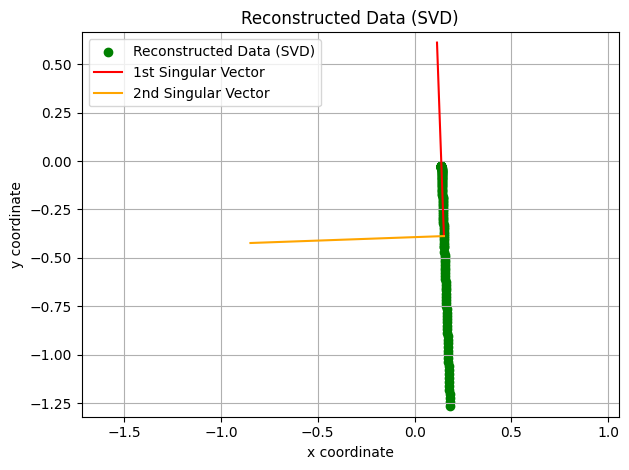

In [33]:
X_reconstructed_svd = np.dot(X_reduced_svd, VT[:k, :])
X_reconstructed_svd = X_reconstructed_svd + np.mean(X, axis=0)

plt.scatter(X_reconstructed_svd[:, 0], X_reconstructed_svd[:, 1], color='green', label='Reconstructed Data (SVD)')
plt.plot([mean[0], mean[0] + sv1[0]], [mean[1], mean[1] + sv1[1]], 'r-', label='1st Singular Vector')
plt.plot([mean[0], mean[0] + sv2[0]], [mean[1], mean[1] + sv2[1]],  color='orange', label='2nd Singular Vector')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Reconstructed Data (SVD)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
reconstruction_error = np.mean(np.square(X_centered - X_reconstructed_svd))
print(f'Reconstruction MSE: {reconstruction_error:.8f}')

Reconstruction MSE: 0.08666876


# 4. 기타 모션 데이터 분석

#### 함수 정의

In [37]:
def compare_pca_svd(df, scale=1.0):
    X = df[['x', 'y']].values
    X_centered = scaler.fit_transform(X)
    mean = np.mean(X, axis=0)

    pca = PCA(n_components=2)
    pca.fit(X_centered)
    pca_comps = pca.components_
    pca_ratio = pca.explained_variance_ratio_
    X_pca1d = pca.transform(X_centered)[:, 0]

    print(f"PCA components: {pca_comps.tolist()}")
    print(f"Explained Variance Ratio: {pca_ratio.tolist()}\n")

    U, sigma, VT = np.linalg.svd(X_centered, full_matrices=False)
    svd_ratio = (sigma**2) / np.sum(sigma**2)
    X_svd1d = U[:, 0] * sigma[0]

    print(f"SVD singular values: {sigma.tolist()}")
    print(f"Explained Variance Ratio: {svd_ratio.tolist()}")

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    ax = axes[0, 0]
    ax.scatter(X[:, 0], X[:, 1], alpha=0.6, label='Original Data')
    ax.arrow(mean[0], mean[1], pca_comps[0, 0] * scale, pca_comps[0, 1] * scale, head_width=0.05 * scale, color='r', label='1st PCA axis')
    ax.arrow(mean[0], mean[1], pca_comps[1, 0] * scale, pca_comps[1, 1] * scale, head_width=0.05 * scale, color='orange', label='2nd PCA axis')
    ax.set_title('PCA: Data & Component Axes')
    ax.set_xlabel('x coordinate')
    ax.set_ylabel('y coordinate')
    ax.axis('equal')
    ax.grid(True)
    ax.legend()

    ax = axes[1, 0]
    ax.plot(df['t'], X_pca1d, 'o-', color='r', label='PCA 1D projection')
    ax.set_title('Change in Reduced Dimension over Time (PCA)')
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Component value')
    ax.grid(True)
    ax.legend()

    ax = axes[0, 1]
    ax.scatter(X[:, 0], X[:, 1], alpha=0.6, label='Original Data')
    ax.arrow(mean[0], mean[1], VT[0, 0] * scale, VT[0, 1] * scale, head_width=0.05 * scale, color='r', label='1st Singular vector')
    ax.arrow(mean[0], mean[1], VT[1, 0] * scale, VT[1, 1] * scale, head_width=0.05 * scale, color='orange', label='2nd Singular vector')
    ax.set_title('SVD: Data & Singular Vectors')
    ax.set_xlabel('x coordinate')
    ax.set_ylabel('y coordinate')
    ax.axis('equal')
    ax.grid(True)
    ax.legend()

    ax = axes[1, 1]
    ax.plot(df['t'], X_svd1d, 'o-', color='orange', label='SVD 1D projection')
    ax.set_title('Change in Reduced Dimension over Time (SVD)')
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Component value')
    ax.grid(True)
    ax.legend()

    plt.tight_layout()
    plt.show()


#### (1) Shoot and Drop ([링크](https://www.youtube.com/watch?v=zMF4CD7i3hg))

In [49]:
shoot_n_drop = pd.read_excel("shoot_n_drop.xlsx")

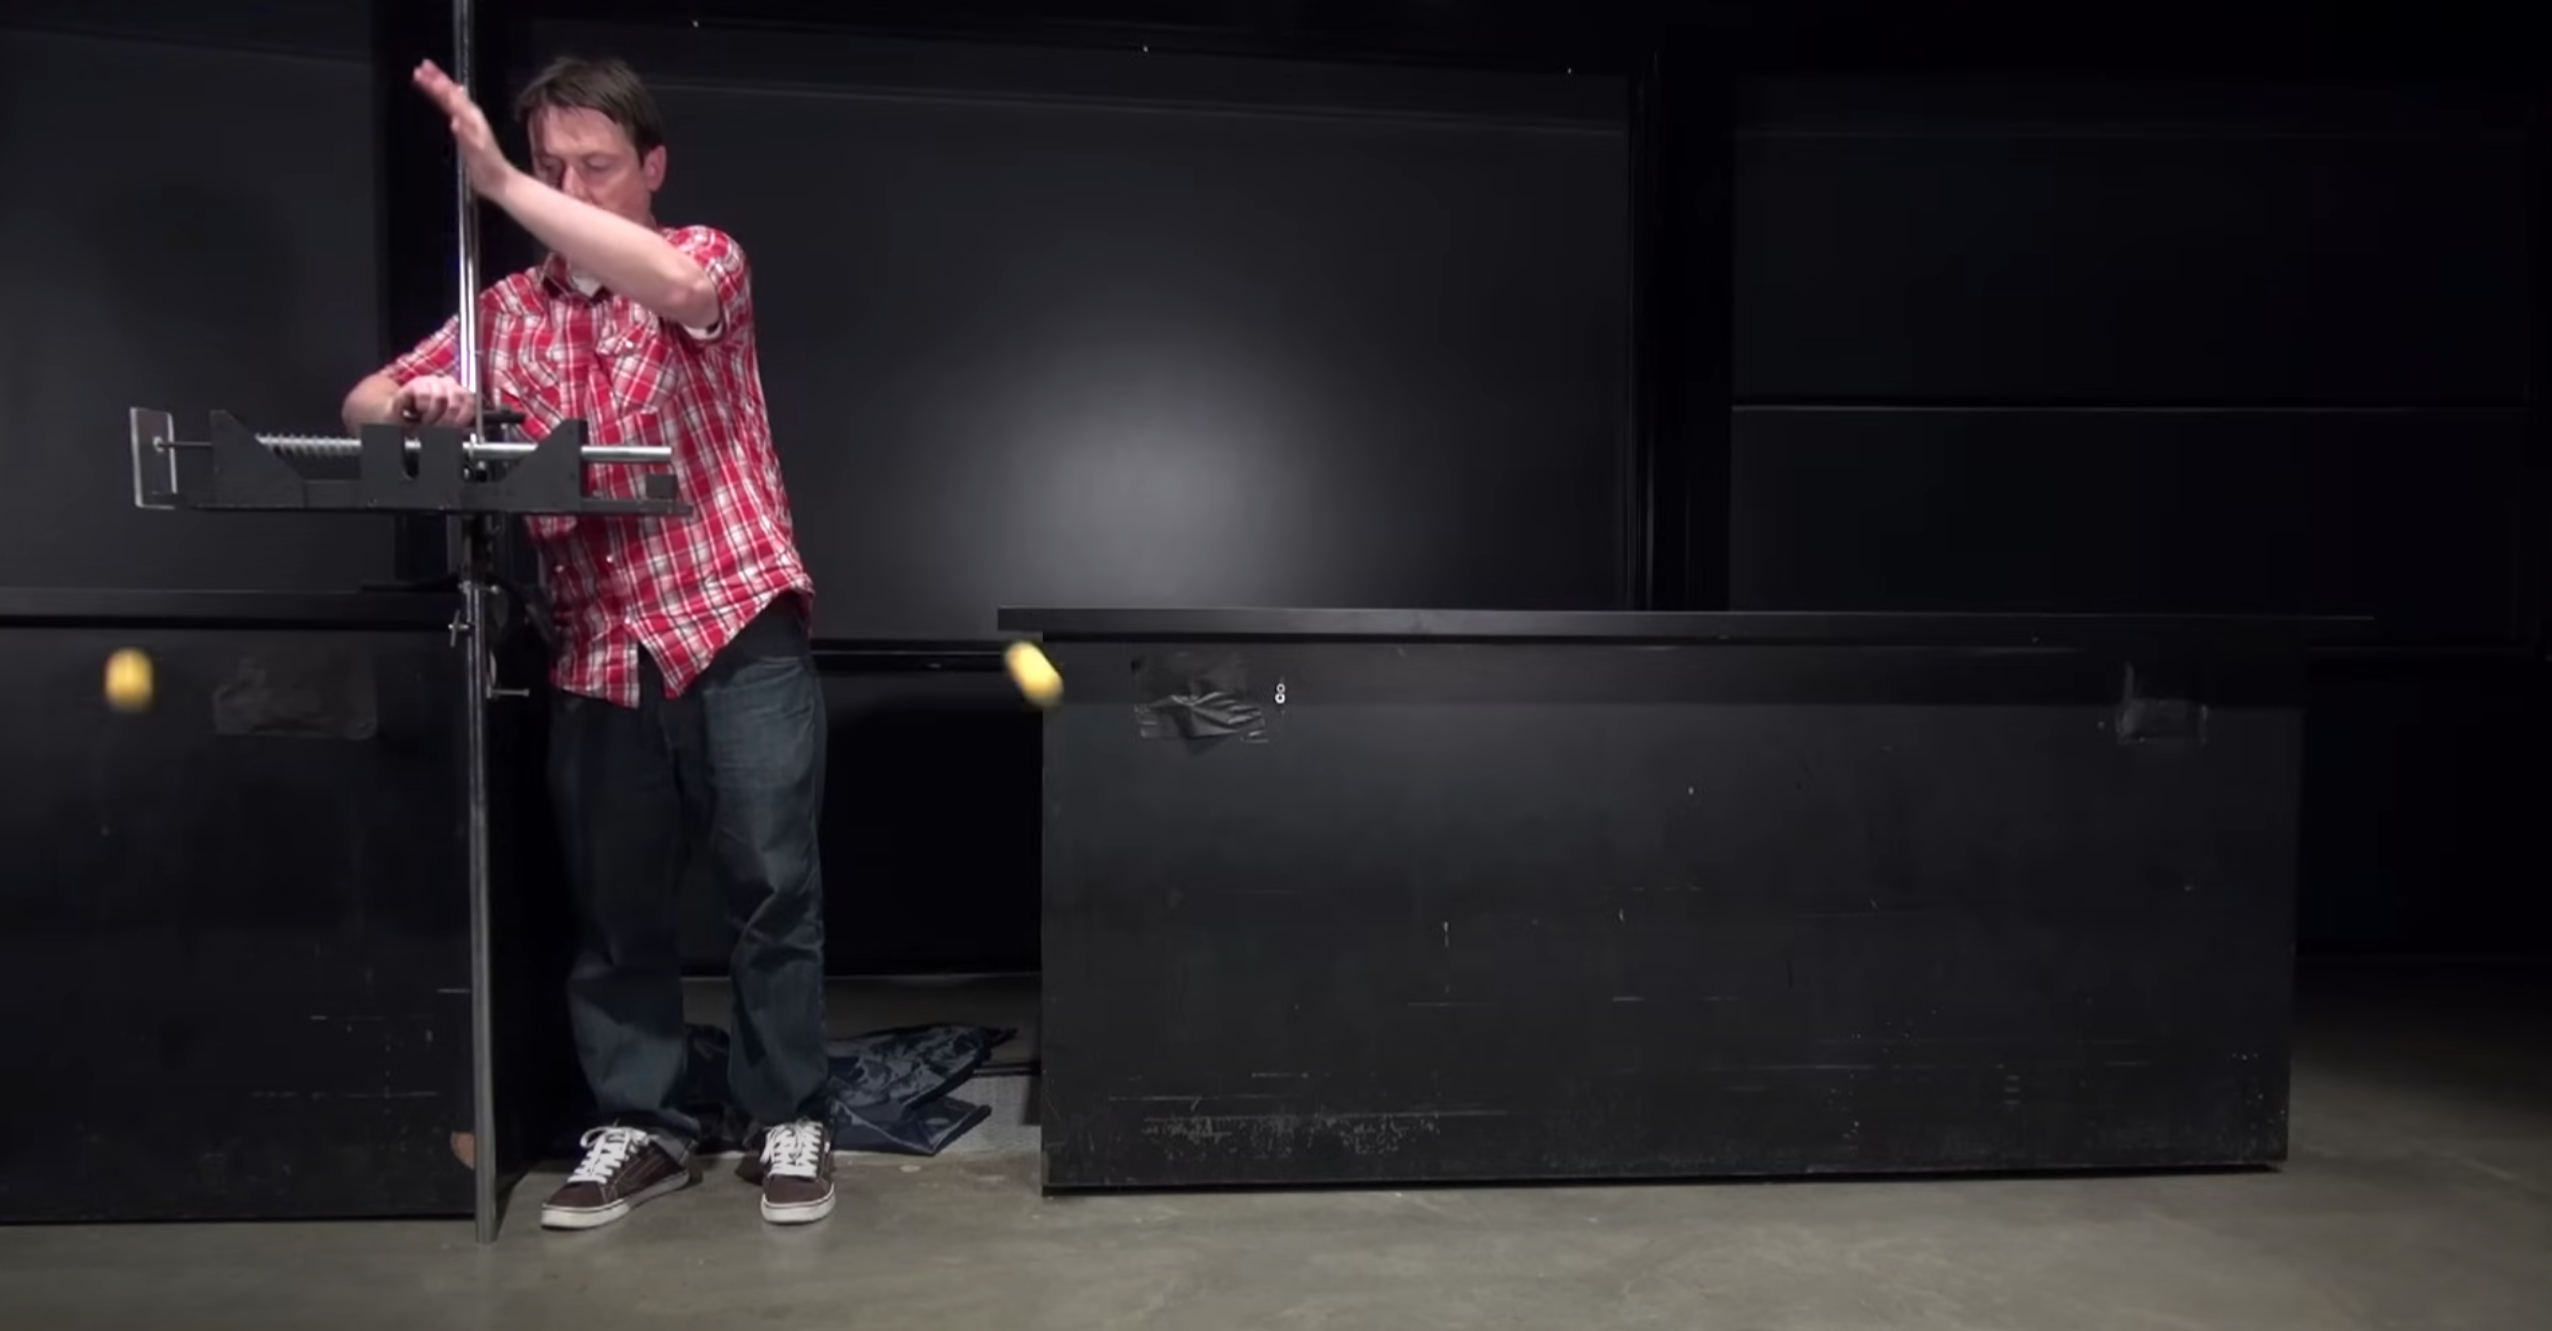

PCA components: [[0.9548200427309977, -0.2971845991958122], [0.2971845991958122, 0.9548200427309977]]
Explained Variance Ratio: [0.9145453136544405, 0.08545468634555943]

SVD singular values: [11.713040644374452, 3.5804282755485017]
Explained Variance Ratio: [0.9145453136544406, 0.08545468634555946]


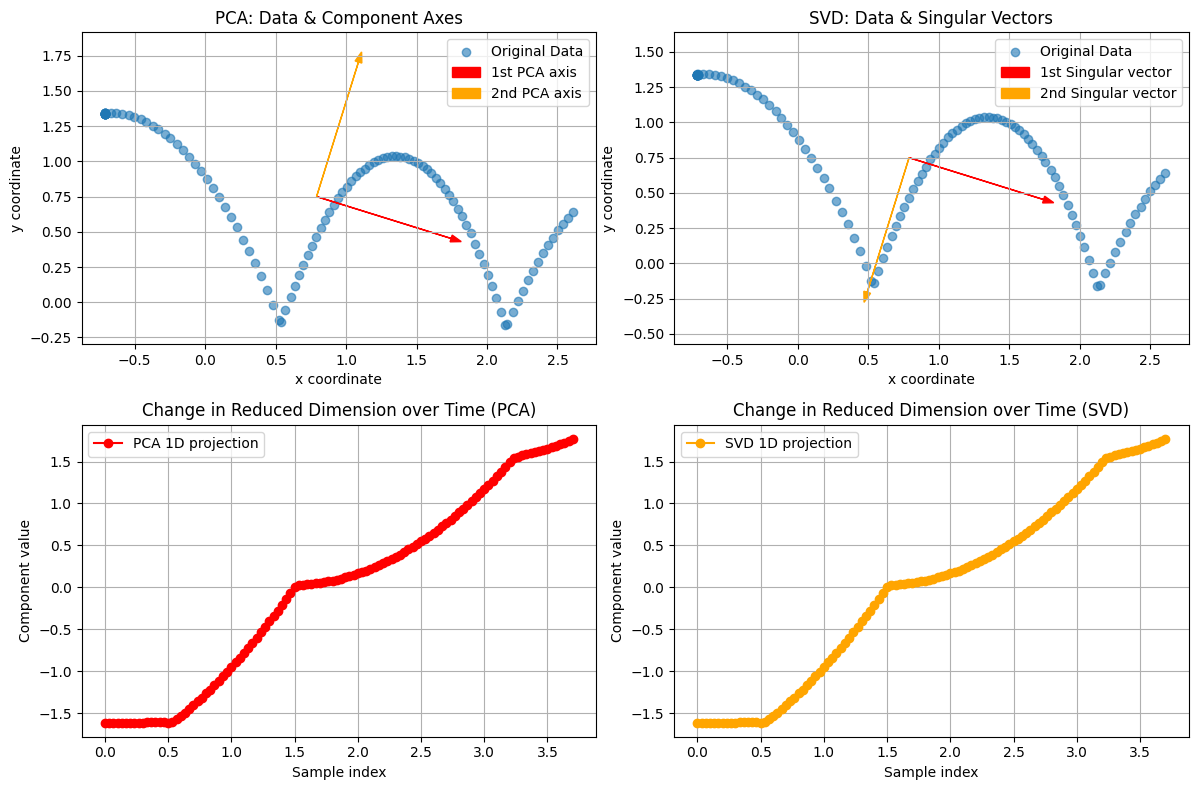

In [50]:
compare_pca_svd(shoot_n_drop)

#### (2) Pendulum ([링크](https://www.youtube.com/watch?v=lbOdtjaEZ4U))

In [51]:
pendulum = pd.read_excel("pendulum.xlsx")

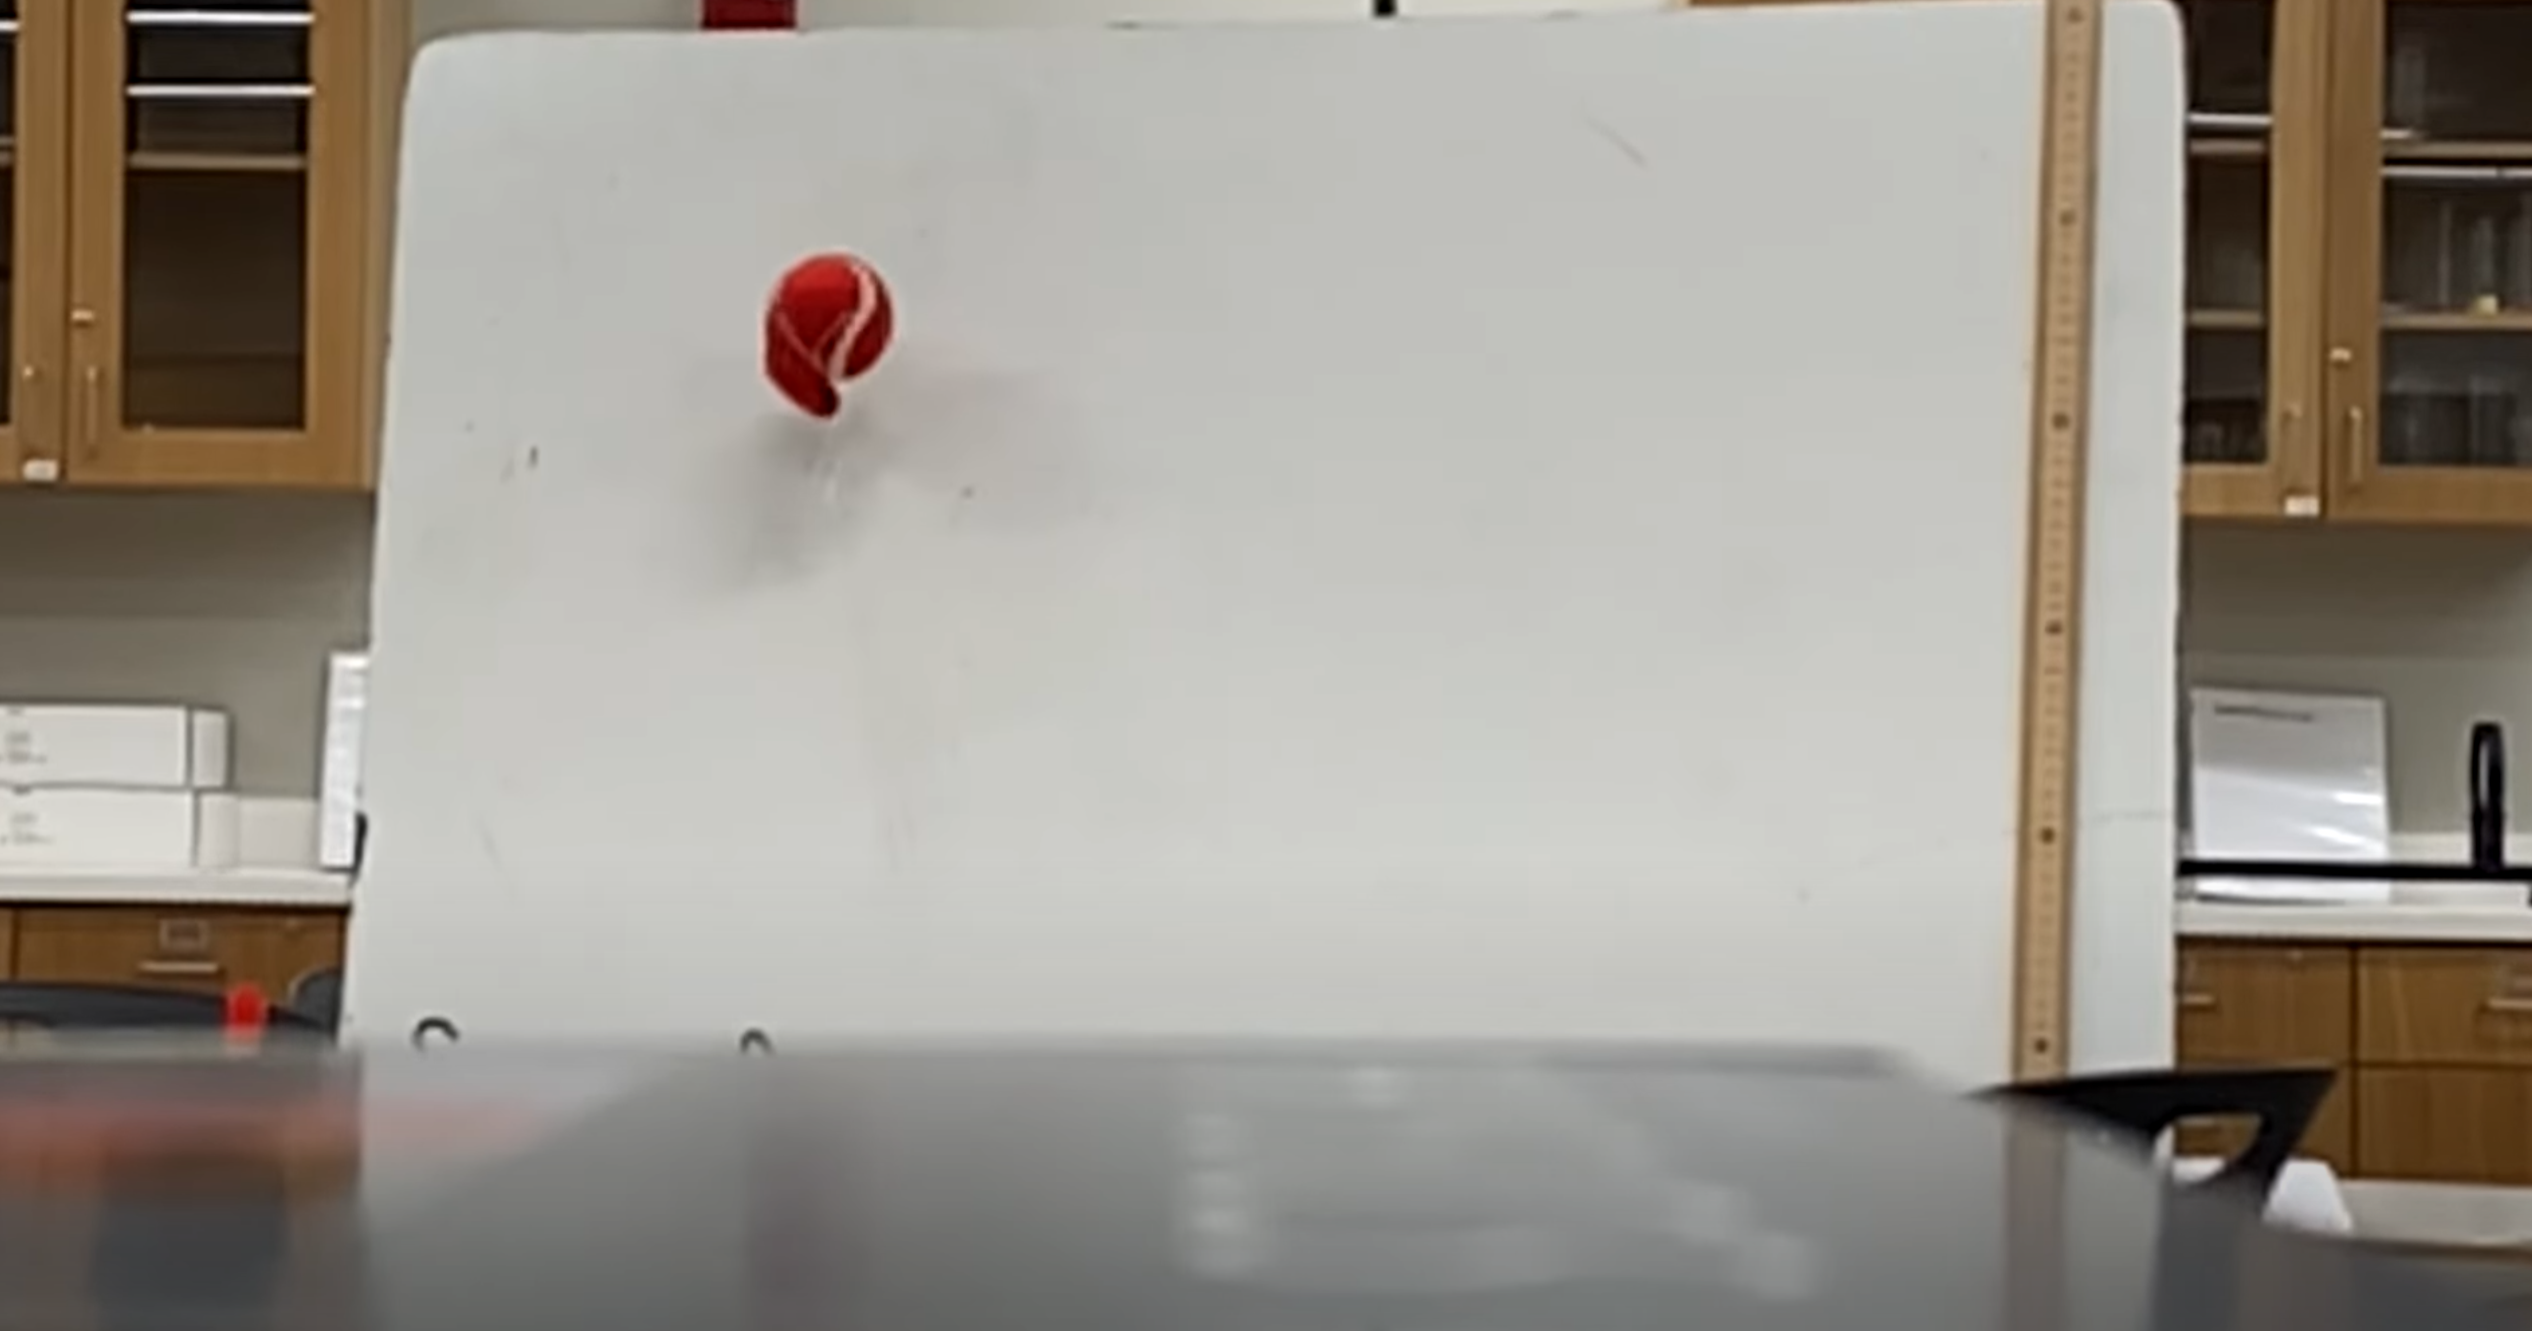

PCA components: [[0.9996595140528968, 0.02609321681062406], [-0.02609321681062406, 0.9996595140528968]]
Explained Variance Ratio: [0.9900025074479338, 0.009997492552066091]

SVD singular values: [1.984860130665349, 0.1994606847379698]
Explained Variance Ratio: [0.9900025074479339, 0.009997492552066094]


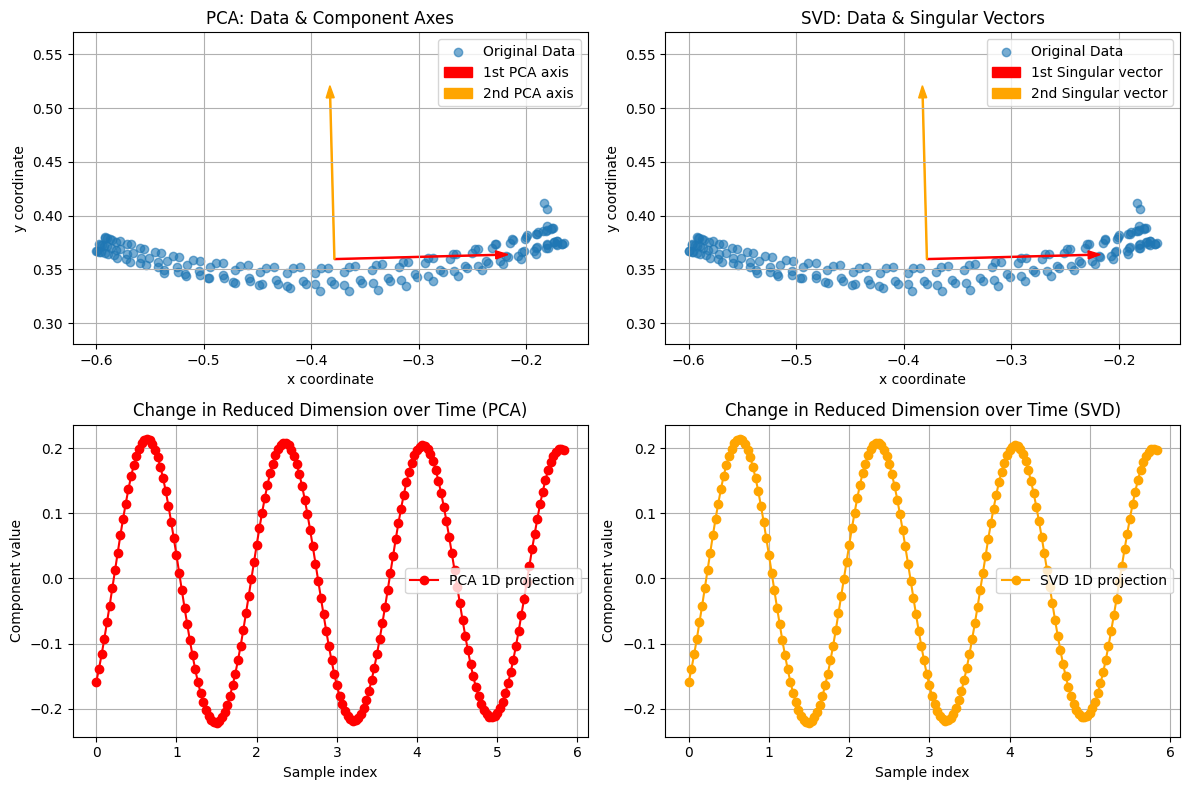

In [52]:
compare_pca_svd(pendulum, scale=0.15)

#### (3) Bouncy Ball ([링크](https://www.youtube.com/watch?v=tTt886y0rWI&t=12s))

In [53]:
bouncy_ball = pd.read_excel("bouncy_ball.xlsx")

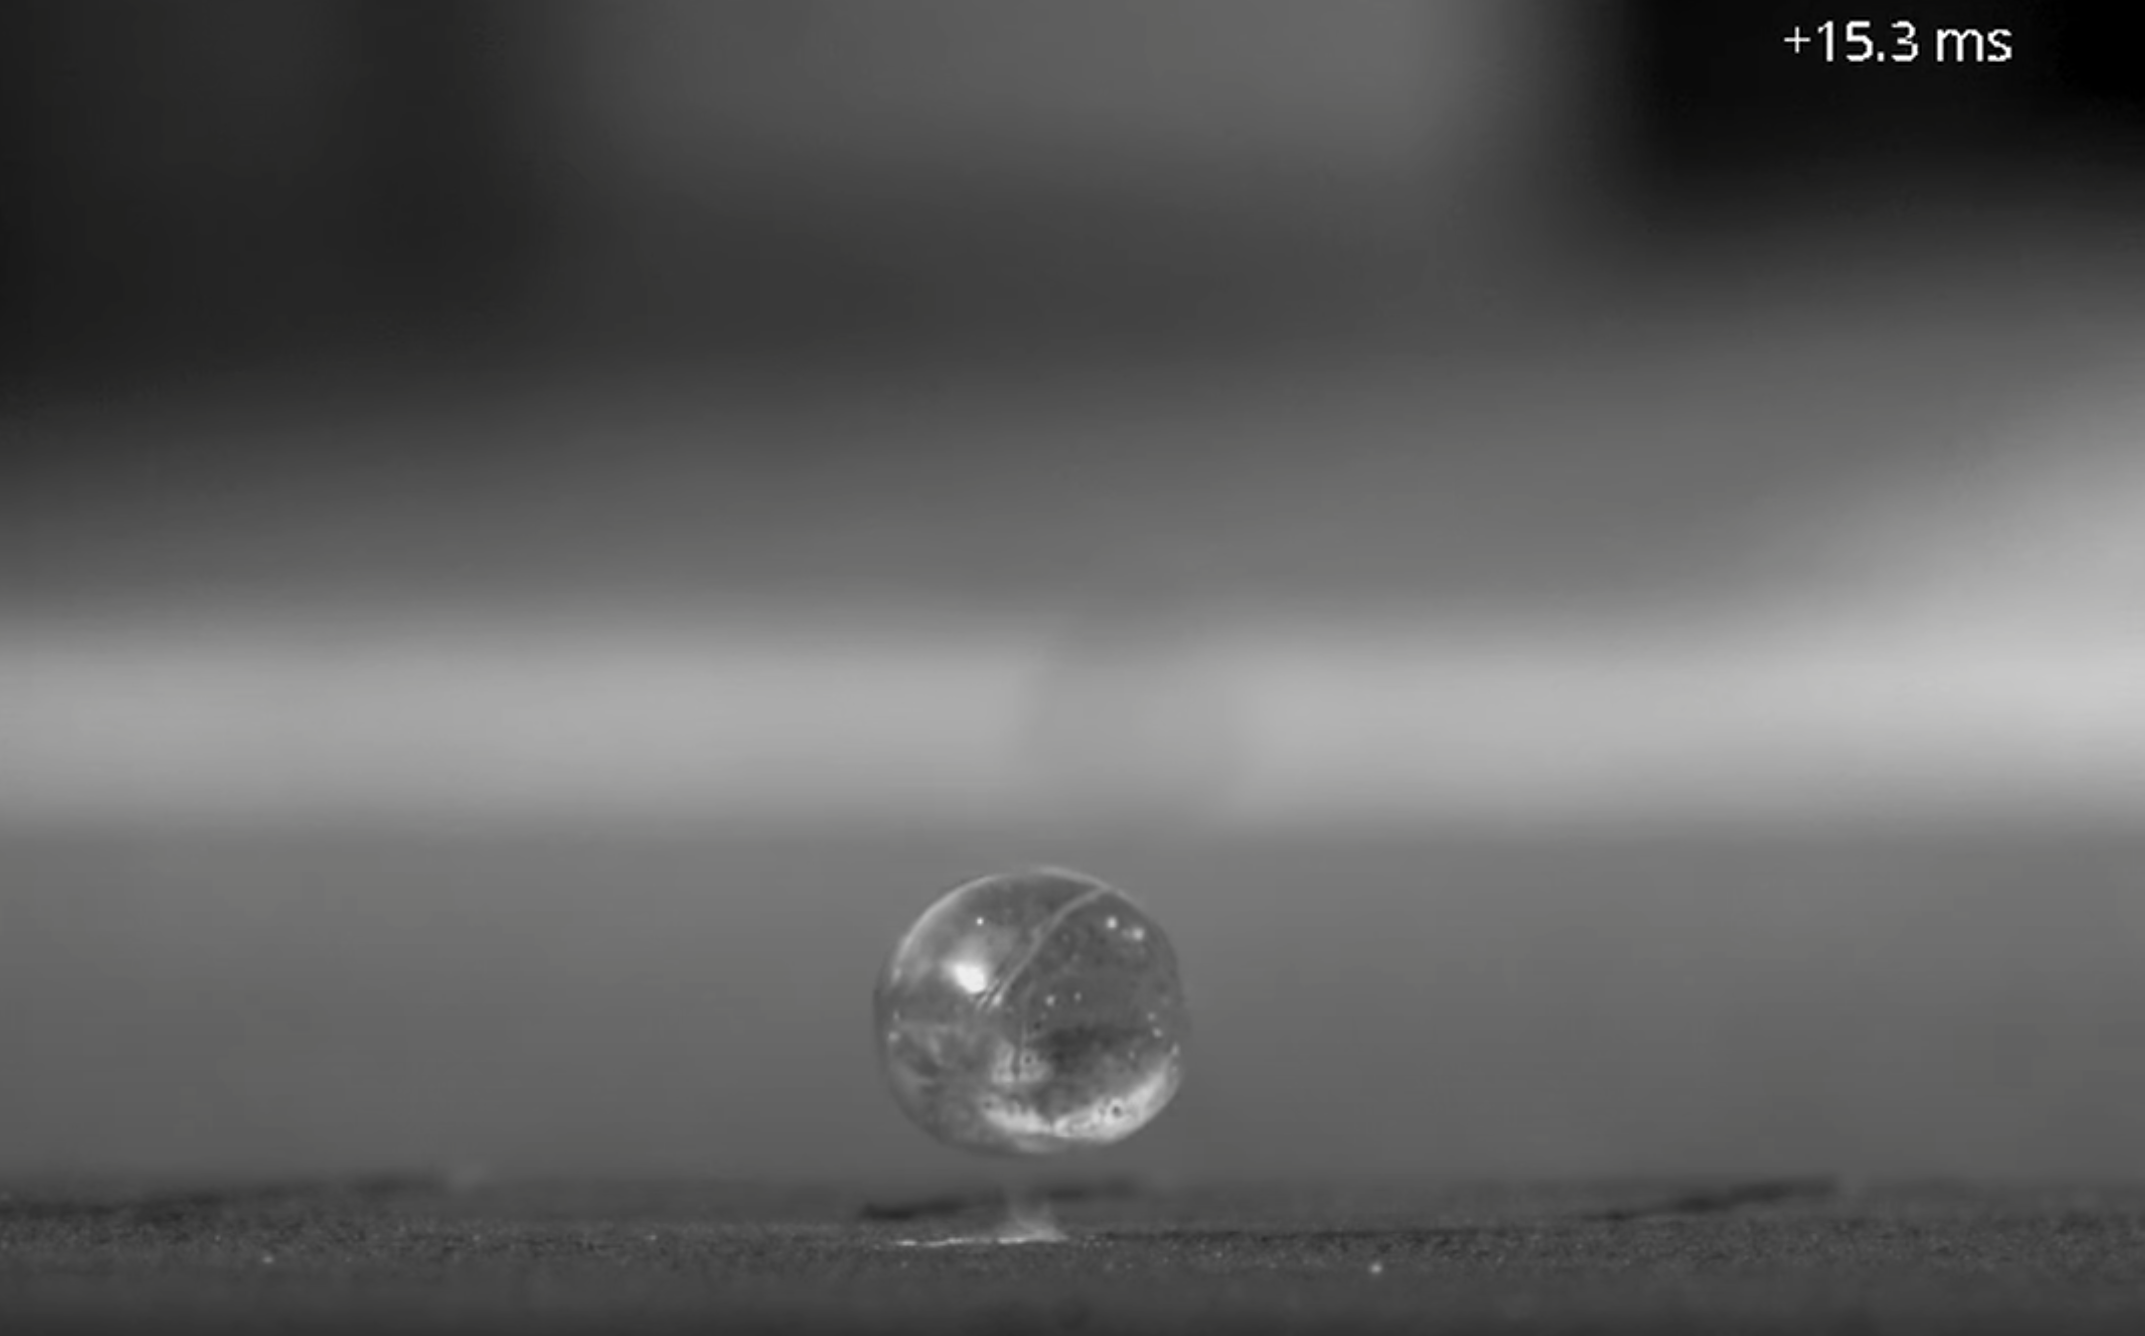

PCA components: [[-0.029924002432518974, 0.9995521767663851], [0.9995521767663851, 0.029924002432518974]]
Explained Variance Ratio: [0.966685102753127, 0.03331489724687304]

SVD singular values: [1.7257888467153906, 0.3203792527131228]
Explained Variance Ratio: [0.9666851027531269, 0.033314897246873025]


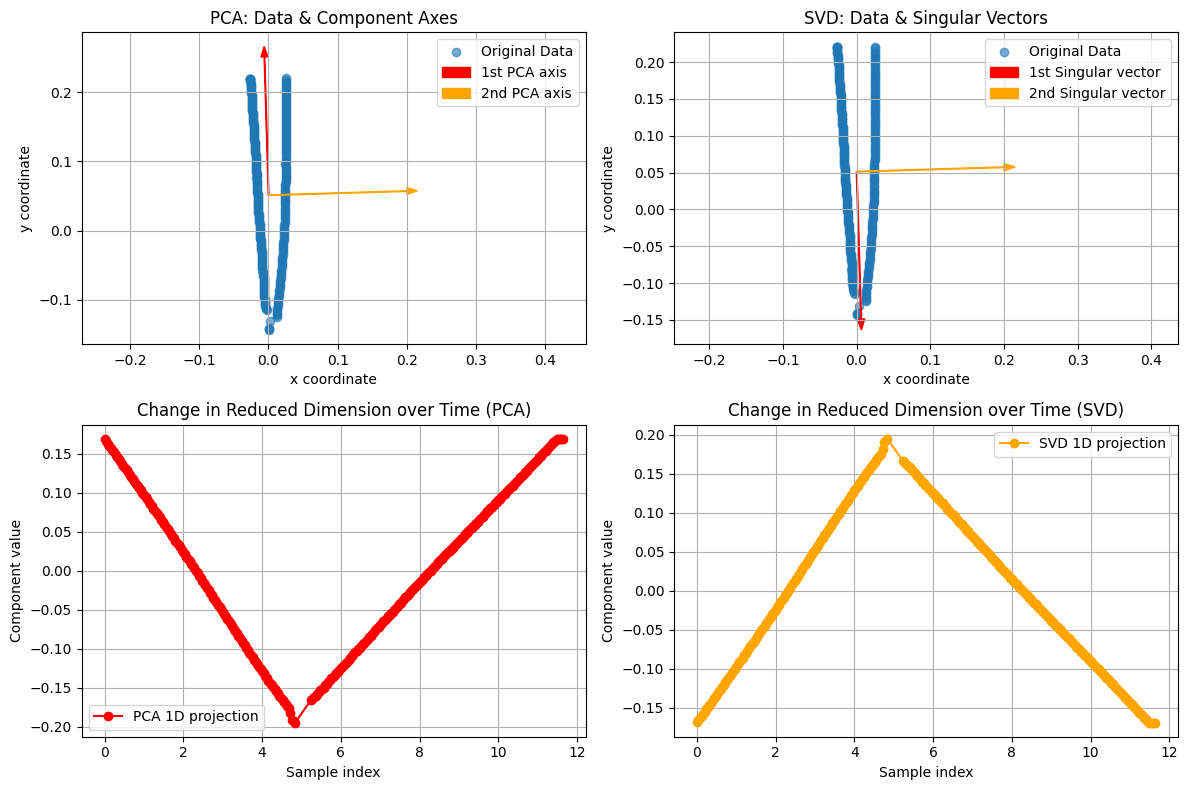

In [54]:
compare_pca_svd(bouncy_ball, scale=0.2)

#### (4) Circular Motion ([링크](https://www.youtube.com/watch?v=AL2Chc6p_Kk))

In [55]:
circular_motion = pd.read_excel("circular_motion.xlsx")

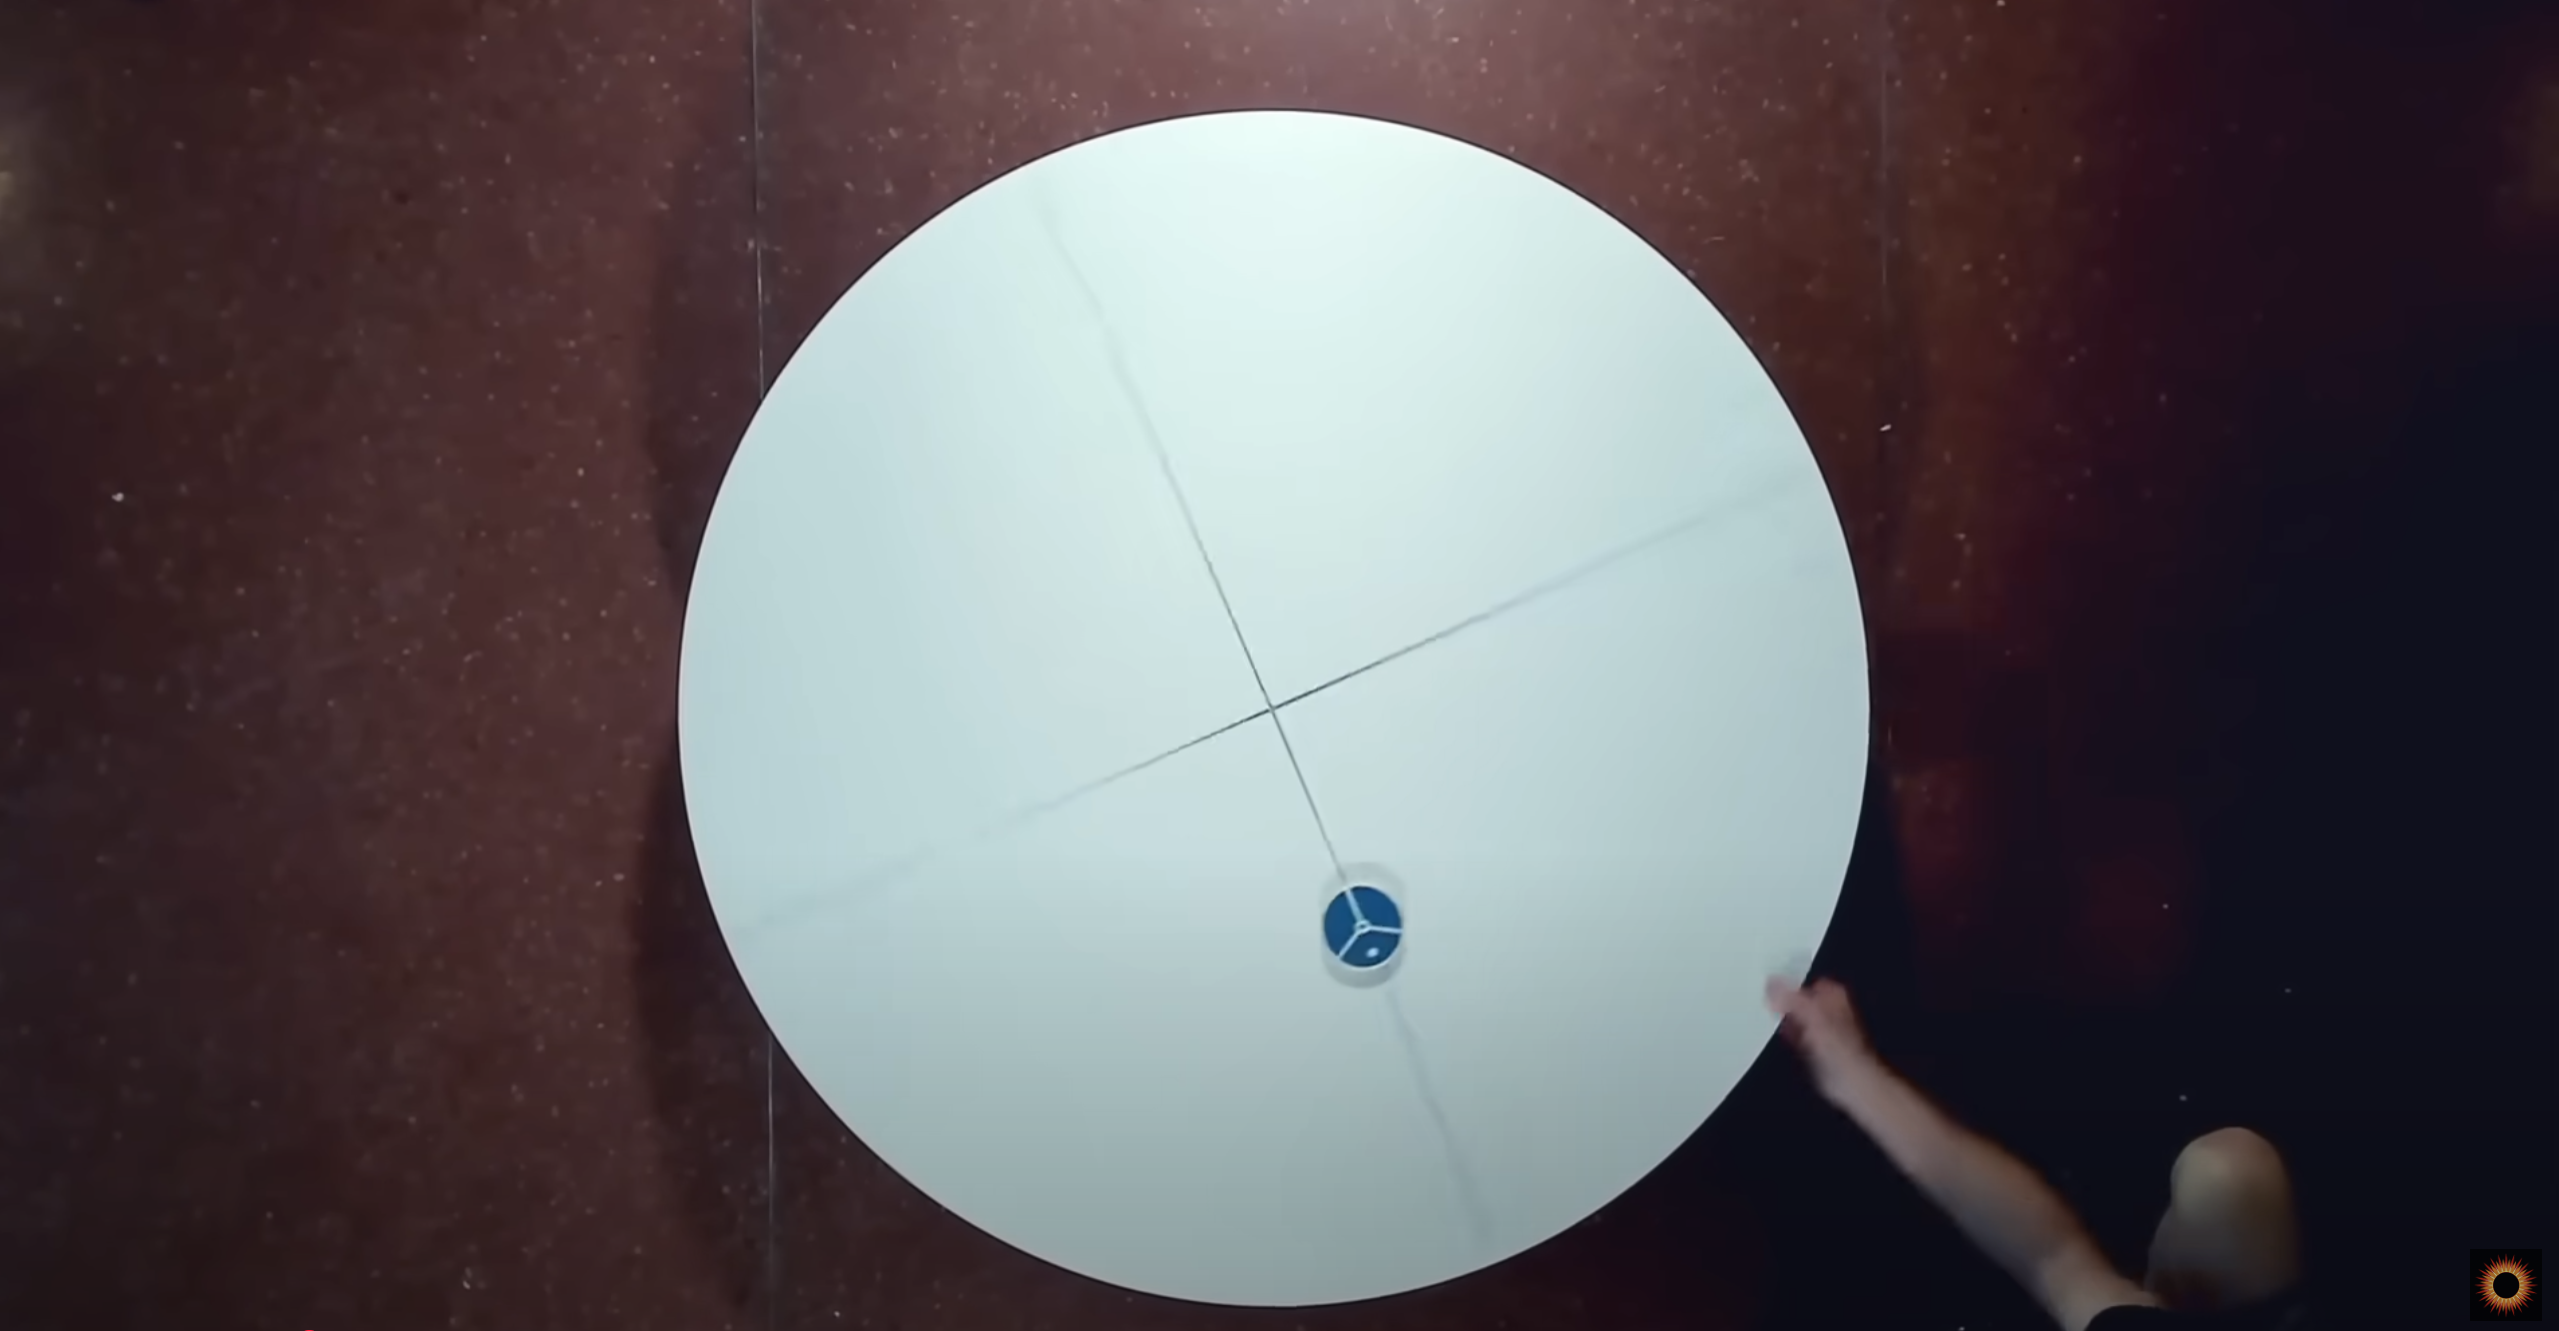

PCA components: [[0.8682756333011479, -0.4960820744750719], [0.4960820744750719, 0.8682756333011479]]
Explained Variance Ratio: [0.5211348424914468, 0.4788651575085532]

SVD singular values: [6.563781853303926, 6.291956376981494]
Explained Variance Ratio: [0.5211348424914467, 0.4788651575085533]


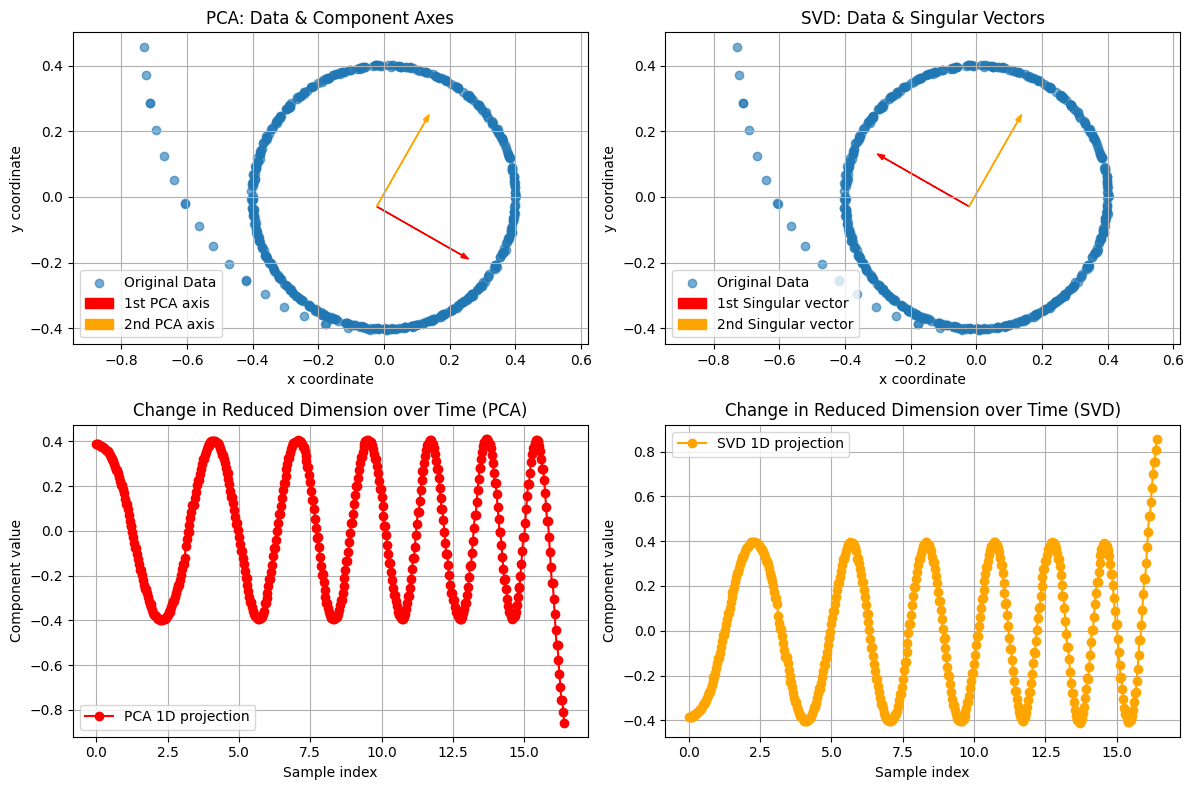

In [56]:
compare_pca_svd(circular_motion, scale=0.3)